In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('Desktop/clean_Reviews.csv', 
                 sep=';',           # разделитель - точка с запятой
                 encoding='utf-8')

print("✅ Файл загружен!")
print(f"Размер: {df.shape}")

df.head()



✅ Файл загружен!
Размер: (184, 10)


,review_id,date,source,product,rating,review_text,lang,sentiment,topics,key_phrases
0,1,2024-05-01,WebApp,Смартфон «Аврора»,5,"Отличный телефон! Батарея держит два дня, каме...",RU,positive,"батарея, камера, общая оценка",Высокая автономность и качество камеры.
1,2,2024-05-01,MobileApp,Ноутбук «Орион»,4,"Хороший ноутбук для работы, но немного тяжеловат.",RU,positive,"вес, удобство, работа","Подходит для работы, но имеет большой вес."
2,3,2024-05-02,WebApp,Смарт-часы «Пульс»,2,Постоянно теряют связь с телефоном. Не советую.,RU,negative,"связь, стабильность, Bluetooth",Нестабильное подключение к смартфону.
3,4,2024-05-03,WebApp,Смартфон «Аврора»,3,"Камера не такая хорошая, как обещали в рекламе.",RU,neutral,"камера, реклама, соответствие ожиданиям",Камера уступает заявленным характеристикам.
4,5,2024-05-04,MobileApp,Ноутбук «Орион»,5,"Лучший ноутбук, который у меня был! Быстрый, т...",RU,positive,"производительность, шум, экран","Высокая производительность, низкий уровень шум..."


In [8]:
df.describe()

,review_id,rating
count,184.000000,184.00000
mean,104.043478,3.61413
std,59.451484,1.30070
min,1.000000,1.00000
25%,52.750000,3.00000
50%,104.000000,4.00000
75%,155.250000,5.00000
max,205.000000,5.00000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_id    184 non-null    int64 
 1   date         184 non-null    object
 2   source       184 non-null    object
 3   product      184 non-null    object
 4   rating       184 non-null    int64 
 5   review_text  184 non-null    object
 6   lang         184 non-null    object
 7   sentiment    184 non-null    object
 8   topics       184 non-null    object
 9   key_phrases  184 non-null    object
dtypes: int64(2), object(8)
memory usage: 14.5+ KB


In [9]:
df.isnull().sum()

review_id      0
date           0
source         0
product        0
rating         0
review_text    0
lang           0
sentiment      0
topics         0
key_phrases    0
dtype: int64

In [10]:
print(f"Количество продуктов: {df['product'].nunique()}")
print(f"Диапазон дат: от {df['date'].min()} до {df['date'].max()}")

Количество продуктов: 3
Диапазон дат: от 2024-05-01 до 2024-07-31


In [5]:
#ПРЕОБРАЗОВАНИЕ ДАТЫ В DATETIME ФОРМАТ
print("=== ПРЕОБРАЗОВАНИЕ ДАТЫ ===")
print("Тип данных даты до преобразования:", df['date'].dtype)
print("Примеры значений даты:", df['date'].head(3).tolist())

# Преобразование колонки date в datetime формат
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

print("Тип данных даты после преобразования:", df['date'].dtype)
print("Диапазон дат в данных:")
print(f"Самая ранняя дата: {df['date'].min()}")
print(f"Самая поздняя дата: {df['date'].max()}")
print("\n")

# ЧАСТЬ 3: СОЗДАНИЕ ДОПОЛНИТЕЛЬНЫХ КОЛОНОК
print("=== СОЗДАНИЕ ДОПОЛНИТЕЛЬНЫХ КОЛОНОК ===")

# Создание колонки с месяцем
df['month'] = df['date'].dt.month
print("Колонка 'month' создана:")
print("Месяцы в данных:", sorted(df['month'].unique()))
print("Распределение отзывов по месяцам:")
print(df['month'].value_counts().sort_index())
print("\n")

# Создание колонки с номером недели в году
df['week'] = df['date'].dt.isocalendar().week
print("Колонка 'week' создана:")
print("Недели в данных:", sorted(df['week'].unique()))
print("Распределение отзывов по неделям:")
print(df['week'].value_counts().sort_index())
print("\n")

# Создание колонки с днем недели (дополнительно)
df['day_of_week'] = df['date'].dt.day_name()
print("Колонка 'day_of_week' создана:")
print("Дни недели в данных:", df['day_of_week'].unique())
print("Распределение отзывов по дням недели:")
print(df['day_of_week'].value_counts())
print("\n")

# Создание колонки с кварталом (дополнительно)
df['quarter'] = df['date'].dt.quarter
print("Колонка 'quarter' создана:")
print("Кварталы в данных:", df['quarter'].unique())
print("Распределение отзывов по кварталам:")
print(df['quarter'].value_counts().sort_index())
print("\n")

# ЧАСТЬ 4: ПРОВЕРКА РЕЗУЛЬТАТОВ
print("=== ФИНАЛЬНАЯ ПРОВЕРКА ===")
print("Обновленная информация о DataFrame:")
print(df.info())
print("\n")

print("Первые 3 строки с новыми колонками:")
print(df[['review_id', 'date', 'month', 'week', 'day_of_week', 'quarter']].head(3))
print("\n")

print("Статистика по новым временным колонкам:")
print("Месяцы:", df['month'].value_counts().sort_index())
print("Недели:", df['week'].value_counts().sort_index())
print("Дни недели:", df['day_of_week'].value_counts())
print("Кварталы:", df['quarter'].value_counts().sort_index())

# Проверка на пропущенные значения в новых колонках
print("\nПропущенные значения в новых колонках:")
new_columns = ['month', 'week', 'day_of_week', 'quarter']
for col in new_columns:
    missing = df[col].isnull().sum()
    print(f"{col}: {missing} пропущенных значений")

print("\n=== ПРЕОБРАЗОВАНИЕ ЗАВЕРШЕНО УСПЕШНО ===")

df

=== ПРЕОБРАЗОВАНИЕ ДАТЫ ===
Тип данных даты до преобразования: datetime64[ns]
Примеры значений даты: [Timestamp('2024-05-01 00:00:00'), Timestamp('2024-05-01 00:00:00'), Timestamp('2024-05-02 00:00:00')]
Тип данных даты после преобразования: datetime64[ns]
Диапазон дат в данных:
Самая ранняя дата: 2024-05-01 00:00:00
Самая поздняя дата: 2024-07-31 00:00:00


=== СОЗДАНИЕ ДОПОЛНИТЕЛЬНЫХ КОЛОНОК ===
Колонка 'month' создана:
Месяцы в данных: [np.int32(5), np.int32(6), np.int32(7)]
Распределение отзывов по месяцам:
month
5    62
6    61
7    61
Name: count, dtype: int64


Колонка 'week' создана:
Недели в данных: [np.uint32(18), np.uint32(19), np.uint32(20), np.uint32(21), np.uint32(22), np.uint32(23), np.uint32(24), np.uint32(25), np.uint32(26), np.uint32(27), np.uint32(28), np.uint32(29), np.uint32(30), np.uint32(31)]
Распределение отзывов по неделям:
week
18    11
19    13
20    14
21    16
22    13
23    13
24    15
25    13
26    15
27    14
28    15
29    12
30    14
31     6
Name: co

,review_id,date,source,product,rating,review_text,lang,sentiment,topics,key_phrases,month,week,day_of_week,quarter
0,1,2024-05-01,WebApp,Смартфон «Аврора»,5,"Отличный телефон! Батарея держит два дня, каме...",RU,positive,"батарея, камера, общая оценка",Высокая автономность и качество камеры.,5,18,Wednesday,2
1,2,2024-05-01,MobileApp,Ноутбук «Орион»,4,"Хороший ноутбук для работы, но немного тяжеловат.",RU,positive,"вес, удобство, работа","Подходит для работы, но имеет большой вес.",5,18,Wednesday,2
2,3,2024-05-02,WebApp,Смарт-часы «Пульс»,2,Постоянно теряют связь с телефоном. Не советую.,RU,negative,"связь, стабильность, Bluetooth",Нестабильное подключение к смартфону.,5,18,Thursday,2
3,4,2024-05-03,WebApp,Смартфон «Аврора»,3,"Камера не такая хорошая, как обещали в рекламе.",RU,neutral,"камера, реклама, соответствие ожиданиям",Камера уступает заявленным характеристикам.,5,18,Friday,2
4,5,2024-05-04,MobileApp,Ноутбук «Орион»,5,"Лучший ноутбук, который у меня был! Быстрый, т...",RU,positive,"производительность, шум, экран","Высокая производительность, низкий уровень шум...",5,18,Saturday,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,201,2024-06-20,WebApp,Смарт-часы «Пульс»,1,Зарядка сломалась в первый же день.,RU,negative,"зарядка, надёжность, брак",Поломка аксессуара сразу после покупки.,6,25,Thursday,2
180,202,2024-06-25,MobileApp,Смартфон «Аврора»,1,Телефон выключается сам по себе. Пользоваться ...,RU,negative,"стабильность, ПО, поломка",Непредсказуемые выключения делают устройство н...,6,26,Tuesday,2
181,203,2024-07-01,WebApp,Ноутбук «Орион»,2,"Очень шумный, как пылесос. Раздражает.",RU,negative,"шум, охлаждение, комфорт",Чрезмерный уровень шума системы охлаждения.,7,27,Monday,3
182,204,2024-07-05,MobileApp,Смарт-часы «Пульс»,1,"Не стоят своих денег, функционал на нуле.",RU,negative,"функционал, цена, ценность",Полное отсутствие заявленных возможностей.,7,27,Friday,3


In [6]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

print("=== МЕТРИКА 1: СРЕДНИЙ РЕЙТИНГ ПО ПРОДУКТАМ ===\n")

# Группировка данных по продуктам и расчет метрик
product_metrics = df.groupby('product').agg({
    'rating': ['mean', 'count'],  # средний рейтинг и количество отзывов
    'review_id': 'count'          # альтернативный способ подсчета
}).round(2)

# Переименование колонок для удобства
product_metrics.columns = ['avg_rating', 'reviews_count', 'total_reviews']
product_metrics = product_metrics[['avg_rating', 'reviews_count']]

# Сортировка по убыванию среднего рейтинга
product_metrics = product_metrics.sort_values('avg_rating', ascending=False)

print("Средний рейтинг и количество отзывов по продуктам:")
print("=" * 50)
for product, row in product_metrics.iterrows():
    print(f"📱 {product}:")
    print(f"   ★ Средний рейтинг: {row['avg_rating']}/5")
    print(f"   📊 Количество отзывов: {row['reviews_count']}")
    print("-" * 40)

# Дополнительная аналитика
print(f"\n📈 ОБЩАЯ СТАТИСТИКА:")
print(f"Всего продуктов: {len(product_metrics)}")
print(f"Продукт с наивысшим рейтингом: {product_metrics.index[0]} ({product_metrics.iloc[0]['avg_rating']})")
print(f"Продукт с наибольшим количеством отзывов: {product_metrics.sort_values('reviews_count', ascending=False).index[0]}")
print(f"Общее количество отзывов: {product_metrics['reviews_count'].sum()}")

print("\n" + "="*80 + "\n")

print("=== МЕТРИКА 2: РАСПРЕДЕЛЕНИЕ ТОНАЛЬНОСТИ ПО ИСТОЧНИКАМ ===\n")

# Создание кросс-таблицы с абсолютными значениями
cross_table_abs = pd.crosstab(df['source'], df['sentiment'], margins=True)
print("АБСОЛЮТНЫЕ ЗНАЧЕНИЯ:")
print("=" * 40)
print(cross_table_abs)
print("\n")

# Создание кросс-таблицы с процентным соотношением (по строкам)
cross_table_pct = pd.crosstab(df['source'], df['sentiment'], normalize='index') * 100
cross_table_pct = cross_table_pct.round(2)

print("ПРОЦЕНТНОЕ СООТНОШЕНИЕ (по источникам):")
print("=" * 50)
for source in cross_table_pct.index:
    if source != 'All':  # Пропускаем итоговую строку
        print(f"📱 {source}:")
        for sentiment in cross_table_pct.columns:
            percentage = cross_table_pct.loc[source, sentiment]
            absolute = cross_table_abs.loc[source, sentiment]
            print(f"   {sentiment}: {percentage}% ({absolute} отзывов)")
        print("-" * 30)

# Анализ результатов
print("\n📊 АНАЛИТИКА ПО ИСТОЧНИКАМ:")
print("=" * 35)

for source in cross_table_pct.index:
    if source != 'All':
        positive_pct = cross_table_pct.loc[source, 'positive']
        negative_pct = cross_table_pct.loc[source, 'negative'] if 'negative' in cross_table_pct.columns else 0
        neutral_pct = cross_table_pct.loc[source, 'neutral'] if 'neutral' in cross_table_pct.columns else 0
        
        print(f"\n🔹 {source}:")
        if positive_pct > 50:
            print(f"   ✅ Преобладают положительные отзывы ({positive_pct}%)")
        elif negative_pct > 30:
            print(f"   ⚠️  Значительная доля отрицательных отзывов ({negative_pct}%)")
        else:
            print(f"   📊 Сбалансированное распределение тональностей")

print("\n" + "="*80 + "\n")

print("=== МЕТРИКА 3: АНАЛИЗ ТЕМ ПО ТОНАЛЬНОСТИ ===\n")

# Функция для извлечения и подсчета тем
def analyze_topics_by_sentiment(dataframe, sentiment_column='sentiment', topics_column='topics'):
    sentiment_topics = {}
    
    for sentiment in dataframe[sentiment_column].unique():
        # Фильтруем данные по тональности
        sentiment_data = dataframe[dataframe[sentiment_column] == sentiment]
        
        # Извлекаем все темы и разделяем по запятым
        all_topics = []
        for topics_str in sentiment_data[topics_column].dropna():
            # Разделяем строку тем по запятым и очищаем от пробелов
            topics_list = [topic.strip() for topic in topics_str.split(',')]
            all_topics.extend(topics_list)
        
        # Подсчитываем частоту тем
        topic_counts = Counter(all_topics)
        
        # Берем топ-5 самых частых тем
        top_5_topics = topic_counts.most_common(5)
        
        sentiment_topics[sentiment] = {
            'top_topics': top_5_topics,
            'total_topics_mentioned': len(all_topics),
            'unique_topics': len(topic_counts)
        }
    
    return sentiment_topics

# Проводим анализ
topics_analysis = analyze_topics_by_sentiment(df)

print("ТОП-5 САМЫХ ЧАСТЫХ ТЕМ ПО ТОНАЛЬНОСТИ:")
print("=" * 55)

for sentiment, analysis in topics_analysis.items():
    print(f"\n🎯 {sentiment.upper()} ОТЗЫВЫ:")
    print(f"   Всего упоминаний тем: {analysis['total_topics_mentioned']}")
    print(f"   Уникальных тем: {analysis['unique_topics']}")
    print(f"   Топ-5 самых частых тем:")
    
    for i, (topic, count) in enumerate(analysis['top_topics'], 1):
        percentage = (count / analysis['total_topics_mentioned']) * 100
        print(f"   {i}. {topic}: {count} раз ({percentage:.1f}%)")
    
    print("-" * 40)

# Дополнительный анализ пересечения тем
print("\n📈 СРАВНИТЕЛЬНЫЙ АНАЛИЗ ТЕМ:")
print("=" * 35)

# Собираем все уникальные темы из топ-5 каждой тональности
all_top_topics = set()
for sentiment, analysis in topics_analysis.items():
    for topic, count in analysis['top_topics']:
        all_top_topics.add(topic)

print("Темы, которые встречаются в топ-5 разных тональностей:")
common_topics = {}
for topic in all_top_topics:
    mentions = []
    for sentiment, analysis in topics_analysis.items():
        for top_topic, count in analysis['top_topics']:
            if top_topic == topic:
                mentions.append(sentiment)
    if len(mentions) > 1:
        common_topics[topic] = mentions

if common_topics:
    for topic, sentiments in common_topics.items():
        print(f"   🔸 {topic}: встречается в {', '.join(sentiments)} отзывах")
else:
    print("   Нет общих тем в топ-5 разных тональностей")

print("\n" + "="*80)
print("✅ АНАЛИЗ ЗАВЕРШЕН! Все метрики успешно рассчитаны.")

=== МЕТРИКА 1: СРЕДНИЙ РЕЙТИНГ ПО ПРОДУКТАМ ===

Средний рейтинг и количество отзывов по продуктам:
📱 Смартфон «Аврора»:
   ★ Средний рейтинг: 3.85/5
   📊 Количество отзывов: 66.0
----------------------------------------
📱 Ноутбук «Орион»:
   ★ Средний рейтинг: 3.73/5
   📊 Количество отзывов: 60.0
----------------------------------------
📱 Смарт-часы «Пульс»:
   ★ Средний рейтинг: 3.22/5
   📊 Количество отзывов: 58.0
----------------------------------------

📈 ОБЩАЯ СТАТИСТИКА:
Всего продуктов: 3
Продукт с наивысшим рейтингом: Смартфон «Аврора» (3.85)
Продукт с наибольшим количеством отзывов: Смартфон «Аврора»
Общее количество отзывов: 184


=== МЕТРИКА 2: РАСПРЕДЕЛЕНИЕ ТОНАЛЬНОСТИ ПО ИСТОЧНИКАМ ===

АБСОЛЮТНЫЕ ЗНАЧЕНИЯ:
sentiment  negative  neutral  positive  All
source                                     
MobileApp        16       10        45   71
WebApp           25       17        71  113
All              41       27       116  184


ПРОЦЕНТНОЕ СООТНОШЕНИЕ (по источникам):
📱 Mobil

=== ВИЗУАЛИЗАЦИЯ 1: СТОЛБЧАТАЯ ДИАГРАММА СРЕДНИХ РЕЙТИНГОВ ===



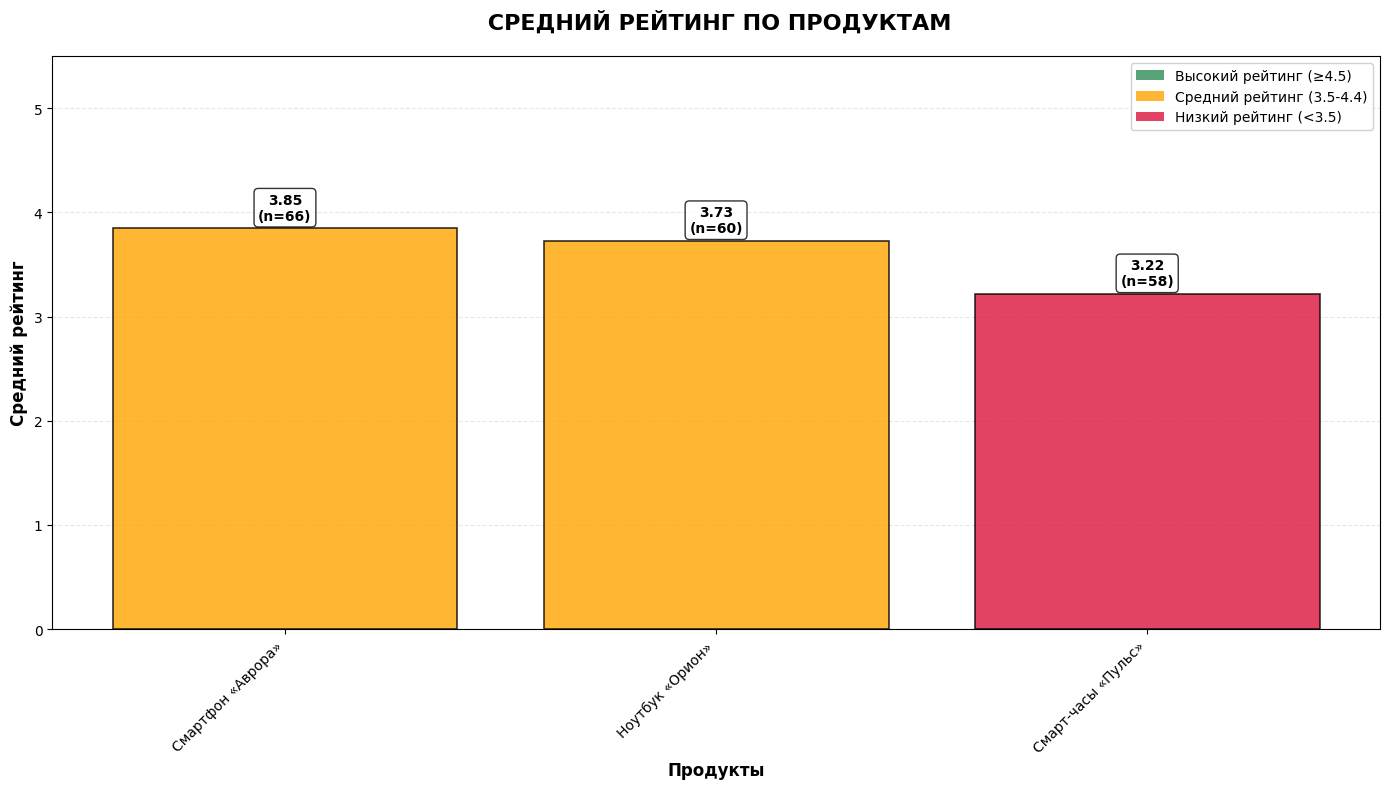

СТАТИСТИКА ПО ПРОДУКТАМ:
⚠️ Смартфон «Аврора»: 3.85/5 (отзывов: 66.0)
⚠️ Ноутбук «Орион»: 3.73/5 (отзывов: 60.0)
❌ Смарт-часы «Пульс»: 3.22/5 (отзывов: 58.0)


=== ВИЗУАЛИЗАЦИЯ 2: РАСПРЕДЕЛЕНИЕ ТОНАЛЬНОСТИ ПО ПРОДУКТАМ ===



<Figure size 1400x800 with 0 Axes>

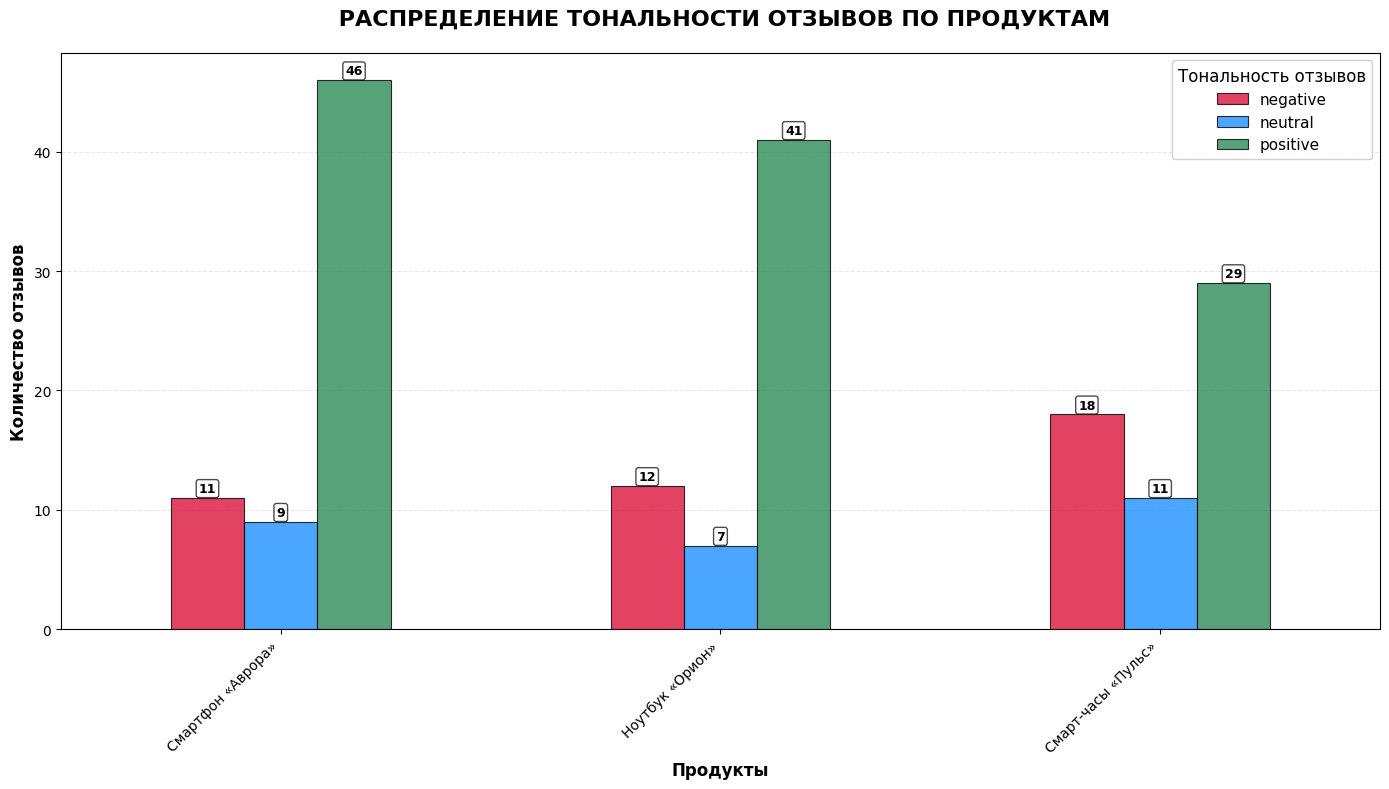

АНАЛИТИКА РАСПРЕДЕЛЕНИЯ ТОНАЛЬНОСТИ:

📦 Смартфон «Аврора»:
   Всего отзывов: 66
   ✅ Положительные: 46 (69.7%)
   ❌ Отрицательные: 11 (16.7%)
   🔷 Нейтральные: 9 (13.6%)
   💚 Преобладают положительные отзывы

📦 Ноутбук «Орион»:
   Всего отзывов: 60
   ✅ Положительные: 41 (68.3%)
   ❌ Отрицательные: 12 (20.0%)
   🔷 Нейтральные: 7 (11.7%)
   💚 Преобладают положительные отзывы

📦 Смарт-часы «Пульс»:
   Всего отзывов: 58
   ✅ Положительные: 29 (50.0%)
   ❌ Отрицательные: 18 (31.0%)
   🔷 Нейтральные: 11 (19.0%)
   📊 Сбалансированное распределение

✅ ВИЗУАЛИЗАЦИИ УСПЕШНО ПОСТРОЕНЫ И ПРОАНАЛИЗИРОВАНЫ!


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import rcParams

# Настройка для корректного отображения русского языка
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.figsize'] = (12, 6)

print("=== ВИЗУАЛИЗАЦИЯ 1: СТОЛБЧАТАЯ ДИАГРАММА СРЕДНИХ РЕЙТИНГОВ ===\n")

# Рассчитываем средний рейтинг по продуктам
product_ratings = df.groupby('product')['rating'].agg(['mean', 'count']).round(2)
product_ratings = product_ratings.sort_values('mean', ascending=False)

# Создаем цветовую схему в зависимости от значения рейтинга
colors = []
for rating in product_ratings['mean']:
    if rating >= 4.5:
        colors.append('#2E8B57')  # зеленый для высоких рейтингов
    elif rating >= 3.5:
        colors.append('#FFA500')  # оранжевый для средних рейтингов
    else:
        colors.append('#DC143C')  # красный для низких рейтингов

# Создаем график
fig, ax = plt.subplots(figsize=(14, 8))

# Столбчатая диаграмма
bars = ax.bar(product_ratings.index, product_ratings['mean'], 
              color=colors, alpha=0.8, edgecolor='black', linewidth=1.2)

# Настройка внешнего вида
ax.set_title(' СРЕДНИЙ РЕЙТИНГ ПО ПРОДУКТАМ', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Продукты', fontsize=12, fontweight='bold')
ax.set_ylabel('Средний рейтинг', fontsize=12, fontweight='bold')

# Добавляем значения над столбцами
for i, (bar, rating, count) in enumerate(zip(bars, product_ratings['mean'], product_ratings['count'])):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.05,
            f'{rating}\n(n={count})', 
            ha='center', va='bottom', 
            fontsize=10, fontweight='bold',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

# Настройка осей
ax.set_ylim(0, 5.5)
ax.grid(True, axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

# Поворачиваем подписи на оси X для лучшей читаемости
plt.xticks(rotation=45, ha='right')

# Добавляем легенду для цветов
legend_elements = [
    plt.Rectangle((0,0),1,1, facecolor='#2E8B57', alpha=0.8, label='Высокий рейтинг (≥4.5)'),
    plt.Rectangle((0,0),1,1, facecolor='#FFA500', alpha=0.8, label='Средний рейтинг (3.5-4.4)'),
    plt.Rectangle((0,0),1,1, facecolor='#DC143C', alpha=0.8, label='Низкий рейтинг (<3.5)')
]
ax.legend(handles=legend_elements, loc='upper right', framealpha=0.9)

plt.tight_layout()
plt.show()

# Выводим статистику
print("СТАТИСТИКА ПО ПРОДУКТАМ:")
print("=" * 50)
for product, row in product_ratings.iterrows():
    rating = row['mean']
    count = row['count']
    if rating >= 4.5:
        emoji = "✅"
    elif rating >= 3.5:
        emoji = "⚠️"
    else:
        emoji = "❌"
    print(f"{emoji} {product}: {rating}/5 (отзывов: {count})")

print("\n" + "="*80 + "\n")
print("=== ВИЗУАЛИЗАЦИЯ 2: РАСПРЕДЕЛЕНИЕ ТОНАЛЬНОСТИ ПО ПРОДУКТАМ ===\n")

# Создаем сводную таблицу для группированной диаграммы
pivot_data = pd.crosstab(df['product'], df['sentiment'])

# Сортируем продукты по общему количеству отзывов
pivot_data = pivot_data.loc[pivot_data.sum(axis=1).sort_values(ascending=False).index]

# Создаем график
plt.figure(figsize=(14, 8))

# Настраиваем цвета для тональностей
palette = {'positive': '#2E8B57', 'negative': '#DC143C', 'neutral': '#1E90FF'}

# Создаем группированную столбчатую диаграмму
ax = pivot_data.plot(kind='bar', 
                     color=[palette.get(col, '#333333') for col in pivot_data.columns],
                     alpha=0.8,
                     edgecolor='black',
                     linewidth=0.8,
                     figsize=(14, 8))

# Настройка внешнего вида
plt.title(' РАСПРЕДЕЛЕНИЕ ТОНАЛЬНОСТИ ОТЗЫВОВ ПО ПРОДУКТАМ', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Продукты', fontsize=12, fontweight='bold')
plt.ylabel('Количество отзывов', fontsize=12, fontweight='bold')

# Добавляем значения на столбцы
for container in ax.containers:
    ax.bar_label(container, 
                 label_type='edge', 
                 fontsize=9, 
                 fontweight='bold',
                 padding=2,
                 bbox=dict(boxstyle="round,pad=0.2", facecolor='white', alpha=0.7))

# Настройка легенды
plt.legend(title='Тональность отзывов', 
           title_fontsize=12,
           fontsize=11,
           framealpha=0.9,
           loc='upper right')

# Настройка сетки
plt.grid(True, axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

# Поворачиваем подписи на оси X
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Дополнительная аналитика
print("АНАЛИТИКА РАСПРЕДЕЛЕНИЯ ТОНАЛЬНОСТИ:")
print("=" * 55)

for product in pivot_data.index:
    total = pivot_data.loc[product].sum()
    positive_pct = (pivot_data.loc[product, 'positive'] / total) * 100 if 'positive' in pivot_data.columns else 0
    negative_pct = (pivot_data.loc[product, 'negative'] / total) * 100 if 'negative' in pivot_data.columns else 0
    neutral_pct = (pivot_data.loc[product, 'neutral'] / total) * 100 if 'neutral' in pivot_data.columns else 0
    
    print(f"\n📦 {product}:")
    print(f"   Всего отзывов: {total}")
    if 'positive' in pivot_data.columns:
        print(f"   ✅ Положительные: {pivot_data.loc[product, 'positive']} ({positive_pct:.1f}%)")
    if 'negative' in pivot_data.columns:
        print(f"   ❌ Отрицательные: {pivot_data.loc[product, 'negative']} ({negative_pct:.1f}%)")
    if 'neutral' in pivot_data.columns:
        print(f"   🔷 Нейтральные: {pivot_data.loc[product, 'neutral']} ({neutral_pct:.1f}%)")
    
    # Анализ преобладающей тональности
    if positive_pct > 60:
        print("   💚 Преобладают положительные отзывы")
    elif negative_pct > 40:
        print("   💔 Значительная доля отрицательных отзывов")
    elif neutral_pct > 50:
        print("   💠 Большинство отзывов нейтральные")
    else:
        print("   📊 Сбалансированное распределение")

print("\n" + "="*80)
print("✅ ВИЗУАЛИЗАЦИИ УСПЕШНО ПОСТРОЕНЫ И ПРОАНАЛИЗИРОВАНЫ!")